In [1]:
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress
import pandas as pd

In [2]:
# opening STAC catalog

catalog = pystac_client.Client.open(
    #"https://storage.googleapis.com/dgds-data-public/coclico/coclico-stac/catalog.json" # cloud API
    r"p:\1000545-054-globalbeaches\15_GlobalCoastalAtlas\coclicodata\current\catalog.json" # P drive API 
)
#catalog

In [3]:
list(catalog.get_children())

[<CollectionClient id=ssl>,
 <CollectionClient id=wef>,
 <CollectionClient id=eesl>,
 <CollectionClient id=floodmaps>,
 <CollectionClient id=sc>,
 <CollectionClient id=cbca>,
 <CollectionClient id=cfr>,
 <CollectionClient id=cm>,
 <CollectionClient id=smd>,
 <CollectionClient id=cisi>,
 <CollectionClient id=shore_mon>,
 <CollectionClient id=shore_mon_hr>,
 <CollectionClient id=shore_mon_fut>,
 <CollectionClient id=sed_class>,
 <CollectionClient id=sed_class>,
 <CollectionClient id=sed_class>]

In [4]:
href = catalog.get_child("sed_class").assets["data"].href
ds = xr.open_zarr(href)
ds

<xarray.Dataset>
Dimensions:         (stations: 1826995)
Coordinates:
    continent       (stations) |S23 dask.array<chunksize=(28547,), meta=np.ndarray>
    country         (stations) |S40 dask.array<chunksize=(28547,), meta=np.ndarray>
    lat             (stations) float64 dask.array<chunksize=(57094,), meta=np.ndarray>
    lon             (stations) float64 dask.array<chunksize=(57094,), meta=np.ndarray>
    transect_geom   (stations) |S93 dask.array<chunksize=(14274,), meta=np.ndarray>
    transect_id     (stations) |S15 dask.array<chunksize=(57094,), meta=np.ndarray>
Dimensions without coordinates: stations
Data variables:
    sediment_label  (stations) int32 dask.array<chunksize=(114188,), meta=np.ndarray>
Attributes: (12/21)
    AUTHOR:              Hulskamp, R., Lhermitte, S., Aarninkhof, S., Luijend...
    CITATION:            Hulskamp, R. et al. (2021). Global distribution of m...
    COMMENT:             Classification label: {0: sand, 1: mud, 2: coastal c...
    CRS:                 EPSG:4326
    Conventions:         CF-1.8
    DESCRIPTION:         The Beach Sediment Classification dataset indicates ...
    ...                  ...
    SPATIAL_EXTENT:      [-180, -90, 180, 90]
    TAGS:                ['civil engineering', 'geomorphology', 'remote sensi...
    TEMPORAL_EXTENT:     []
    TITLE:               Beach Sediment Classification
    TITLE_ABBREVIATION:  sed_class
    UNITS:

In [5]:
label_dict = {0: 'sand', 1 : 'mud', 2: 'cliff', 3: 'vegetated', 4: 'other'}
colors = {'cliff': 'dimgrey', 'sand': 'goldenrod', 'mud': 'saddlebrown', 'vegetated': 'forestgreen', 'other': 'darkgrey'}

In [14]:
indices = np.where(ds['continent'].values == continent)[0]
max(ds['stations'].values)

1826994

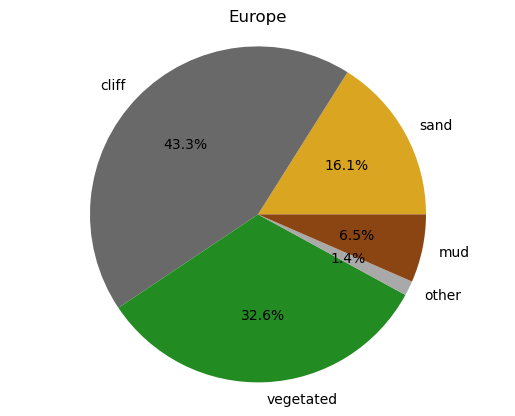

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

continent = b'Europe'
indices = np.where(ds['continent'].values == continent)[0]
europe_sed = [label_dict[x] for x in ds.isel(stations=indices)["sediment_label"].values.astype(int)]
c_lst = dict(Counter(europe_sed))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = c_lst.keys()
sizes = c_lst.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels , colors=[colors[label] for label in labels], autopct='%1.1f%%',)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(continent.decode("utf-8"))
plt.show()

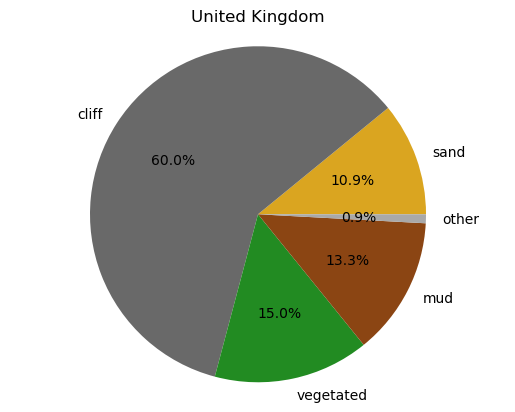

In [16]:
import matplotlib.pyplot as plt
from collections import Counter

country = b'United Kingdom'
indices = np.where(ds['country'].values == country)[0]
europe_sed = [label_dict[x] for x in ds.isel(stations=indices)["sediment_label"].values.astype(int)]
c_lst = dict(Counter(europe_sed))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = c_lst.keys()
sizes = c_lst.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels , colors=[colors[label] for label in labels], autopct='%1.1f%%',)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(country.decode("utf-8"))
plt.show()

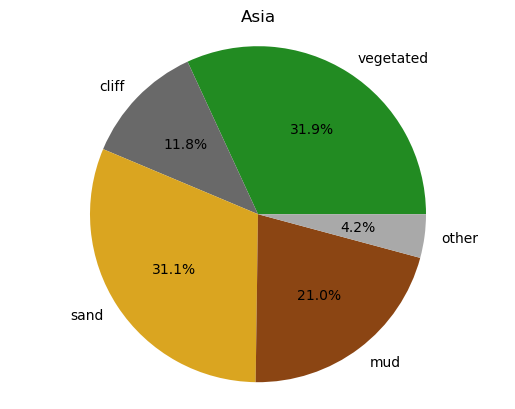

In [ ]:
continent = b'Asia'
indices = np.where(ds['continent'].values == continent)[0]
europe_sed = [label_dict[x] for x in ds.isel(stations=indices)["sediment_label"].values.astype(int)]
c_lst = dict(Counter(europe_sed))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = c_lst.keys()
sizes = c_lst.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=[colors[label] for label in labels], autopct='%1.1f%%',)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(continent.decode("utf-8"))
plt.show()